In [1]:
#  0. import package
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import heapq

In [2]:
##  load the bg frame
path_basis = 'subFrame/'
path_fmt = '.jpg'
bgFrame_index = np.int64(np.loadtxt(path_basis+'BGFrameIndex.txt'))
print(bgFrame_index)

[    0   386   670   871  1171  1292  1478  1595  1840  2019  2210  2492
  2843  3103  3455  3574  3726  3808  3939  4036  4095  4187  4514  4565
  4605  4735  4877  4917  5225  5535  5863  5949  6137  6329  6379  6433
  6495  6531  6558  6609  6652  6765  6789  6999  7207  7277  7370  7421
  7534  7820  7856  7906  8007  8117  8284  8452  8546  8575  8674  8699
  8732  8924  9030  9187  9555  9630 10026 10163 10432 10473 10488 10558
 10626 10733 10804 10881 10925 10973 10989 11130 11167 11195 11311 11394
 11479 11708 11752 11808 11881 11940 12081 12105 12160 12203 12218 12257
 12334 12406 12448 12858 13040 13863 14566 14867 14943 15087 15225 15273
 15390 15457 16047 16192 16268 16389 16657 16711 16820 17060 17241 17354
 17406 17563 17693 17815 17949 18144 18251 18360 18612 18714 18817 18894
 18945 19023 19381 19512 19998 20069 20158 20252 20334 20418 20511 20569
 20625 20780 20815 21038 21090 21489 21542 21584 21627 21664 21701 21733
 21866 21956 22040 22134 22176 22318 22346 22463 22

In [7]:
isYBT = np.zeros(np.shape(bgFrame_index))
for idx in range(np.size(bgFrame_index)):
    ele = bgFrame_index[idx]
    ##  获取rgb-img
    img = cv.cvtColor(cv.imread(path_basis+str(ele)+path_fmt),cv.COLOR_BGR2RGB)
    ##  blur-img
    blurPara = 40
    blurImg = cv.blur(img,(blurPara,blurPara))
    blurHSV = cv.cvtColor(blurImg,cv.COLOR_RGB2HSV)
    [blurImg_h,blurImg_s,blurImg_v] = cv.split(blurHSV)
    ##  find the h with highest number
    h_fillRange = 30
    blurImg_h_countList = []
    for i in range(0,180,1):
        blurImg_h_countList.append(np.sum(blurImg_h==i))  # count # of each h_color_value
    blurImg_h_most = list(map(blurImg_h_countList.index, heapq.nlargest(1, blurImg_h_countList)))[0]  # get color with the largest number
    if (105<blurImg_h_most<120):
        blurImg_h_most_neighborhood = (blurImg_h < (blurImg_h_most+h_fillRange)) & (blurImg_h > (blurImg_h_most-h_fillRange))
        if (0.5<np.sum(blurImg_h_most_neighborhood==1)/np.size(blurImg_h)<0.95):
            isYBT[idx]=1
    print(idx,ele,isYBT[idx])


0 0 0.0
1 386 0.0
2 670 1.0
3 871 1.0
4 1171 1.0
5 1292 1.0
6 1478 1.0
7 1595 1.0
8 1840 1.0
9 2019 1.0
10 2210 1.0
11 2492 1.0
12 2843 1.0
13 3103 1.0
14 3455 0.0
15 3574 0.0
16 3726 0.0
17 3808 0.0
18 3939 0.0
19 4036 0.0
20 4095 0.0
21 4187 0.0
22 4514 0.0
23 4565 0.0
24 4605 0.0
25 4735 0.0
26 4877 0.0
27 4917 0.0
28 5225 0.0
29 5535 0.0
30 5863 0.0
31 5949 0.0
32 6137 1.0
33 6329 0.0
34 6379 0.0
35 6433 0.0
36 6495 0.0
37 6531 0.0
38 6558 0.0
39 6609 0.0
40 6652 0.0
41 6765 0.0
42 6789 0.0
43 6999 0.0
44 7207 0.0
45 7277 0.0
46 7370 0.0
47 7421 0.0
48 7534 0.0
49 7820 0.0
50 7856 0.0
51 7906 0.0
52 8007 0.0
53 8117 0.0
54 8284 0.0
55 8452 0.0
56 8546 0.0
57 8575 0.0
58 8674 0.0
59 8699 0.0
60 8732 0.0
61 8924 0.0
62 9030 0.0
63 9187 0.0
64 9555 0.0
65 9630 0.0
66 10026 0.0
67 10163 0.0
68 10432 0.0
69 10473 0.0
70 10488 0.0
71 10558 0.0
72 10626 0.0
73 10733 0.0
74 10804 0.0
75 10881 0.0
76 10925 0.0
77 10973 0.0
78 10989 0.0
79 11130 0.0
80 11167 0.0
81 11195 0.0
82 11311 0.0
83 

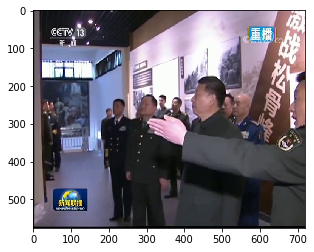

In [11]:
plt.imshow(plt.imread('subFrame/'+str(15273)+'.jpg'))

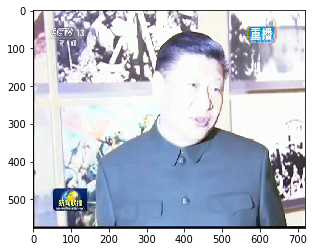

In [12]:
plt.imshow(plt.imread('subFrame/'+str(15390)+'.jpg'))

In [5]:
np.savetxt("subFrame/isYBT.txt", isYBT)
#print(np.sum(isYBT==1))
#print(isYBT)

In [ ]:
# videoCapture = cv2.VideoCapture(img_fileName)  # read the vedio
# videoSuccess, videoFrame = videoCapture.read()  # get the next frame
#
# videoCapture_FPS = videoCapture.get(cv2.CAP_PROP_FPS)  # get the FPS
# videoCapture_frameCount = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)  # get total # of frames in the current video

In [ ]:
#  fill the color block
# h_fillRange = 30
# blurImg2_h_countList = []
# for i in range(0,180,1):
#     blurImg2_h_countList.append(np.sum(blurImg2_h==i))  # count # of each h_color_value

# print("最大的h值：",blurImg2_h_most)

# img2_s[blurImg2_h_most_neighborhood] = np.max(blurImg2_s)
# img2_v[blurImg2_h_most_neighborhood] = np.max(blurImg2_v)
# img2_h[blurImg2_h_most_neighborhood] = blurImg2_h_most
# print(np.sum(blurImg2_h_most_neighborhood==1)/np.size(blurImg2_h))
# print(100<blurImg2_h_most<124)
# # get the final pic
# result2_hsv2 = cv2.merge([img2_h,img2_s,img2_v])
# result2_img2 = cv2.cvtColor(result2_hsv2,cv2.COLOR_HSV2RGB)
# plt.imshow(result2_img2)